In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_1_numpy_and_plotting.ipynb")

# HW 1: Statistical analysis of data using numpy and matplotlib

Resources: Lecture slides describing the homework: https://docs.google.com/presentation/d/1ef0msC9XIT37_Yg94Cf4TL9VBgbIIfkKik8jgshskjE/edit?usp=sharing

Please do lab 1 before starting the first part of this homework, lab 2 before the second part, and lab 3 before tackling the last problem (the plotting part).

In this homework the focus is on code *design*. Most of the functionality of the code will be what you did in the labs. I don't expect you to do the code design; I've provided that. Just pay attention to how a couple of code structuring tools (functions, dictionaries) can make your code a little more re-usable, cleaner, and less prone to error. 

- Generalization 1: Put the code that calculates the statistics into a function 
- Generalization 2: Store the results in a dictionary so it's labeled and you don't have to worry about variable name re-use

Learning to *read* code is also as important as *writing* code. This is (hopefully) a gentle introduction to using/interacting with more advanced concepts/syntax/semantics. 

Where you're going with the week 1 & 2 problems: Take a look in the **Data** directory at the **HW1_check_results.json** file (open it up with a text editor). Compare it to **proxy_data_description.json**.  When you are done with problems 1-3 you will have a dictionary that has the statistical summary data in it. This is much the same as what you did in the last problem in Lab 1, except you'll do it for all data channels.

## Week 1, problem 0: Setting up libraries
TODO: Import the libraries that you will need (numpy, json, matplotlib for week 2)

In [2]:
# Libraries that we need to import - numpy and json (for loading the description file) and matplotlib for plotting


# TODO: put the numpy, json, and matplotlib (week 3) imports here so you can use those libraries (see the tops of Lab 1 and 3)
#  Parts 1 and 2 only need numpy and json. Part 3 needs matplotlib; you can either look at lab 3 and copy the import now or do
#  it later

import numpy as np 
import json as json

In [3]:
grader.check("libraries")

libraries results: All test cases passed!

## Week 1, problem 1 Read and store data

In this problem you'll read in the same data you used in lab 1, calculate the same values/split up the csv data, but this time, "store" everything in the dictionary **pick_data_description**.

Almost all of this is copying the code you wrote in Lab 1 and, instead of storing the result in a variable, store it in the dictionary.

Why do this? As we'll see next week, having all the data in one place - in a dictionary - makes it easier to pass it to functions.

In [4]:
# TODO Read in the csv file "Data/proxy_pick_data.csv"
#  Split it up into the pick data and the successful y/n data (the last column).
#  Calculate the number of picks, number of time steps, and number of channels as before
#
#  Store all of these in a dictionary with the following keys:
# "pick data" - the numeric data (without the last column)
# "success yn" - the successful pick, y/n data
# "n picks" - the total number of picks
# "n successful" - the number of successful picks
#   Note: Do these two after you read in the json file
# "n timesteps" - the number of time steps
# "n total dims" - the total number of data channels per time step

# Dictionary to put all the data in


# TODO Read the data
# TODO Calculate the values above 
try:
    with open("Data/proxy_data_description.json", "r") as fp:
        pick_data_description = json.load(fp)
except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")

data_channels = pick_data_description["Data channels"]
print(data_channels)

n_total_dims = 0

for i in data_channels:
    for k, v in i.items():
        if k=='dimensions':
            n_total_dims = n_total_dims + v



all_data=np.loadtxt('proxy_pick_data.csv',dtype=float,delimiter=',')
pick_data = all_data[:,1:-1]

pick_data_dict = {"pick data": all_data[:,0:-1], 
                  "success yn": all_data[:,-1], 
                  "n picks": len(all_data), 
                  "n successful": np.count_nonzero(all_data[:,-1]), 
                  "n unsuccessful": 660- np.count_nonzero(all_data[:,-1]),
                  "n timesteps":  all_data.shape[1]//n_total_dims, 
                  "n total dims": n_total_dims
}



[{'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}, {'name': 'Wrist torque', 'index_offset': 3, 'dimensions': 3, 'units': 'N.m'}, {'name': 'IMU accel f1', 'index_offset': 6, 'dimensions': 3, 'units': 'gravity units'}, {'name': 'IMU accel f2', 'index_offset': 15, 'dimensions': 3, 'units': 'gravity units'}, {'name': 'IMU accel f3', 'index_offset': 24, 'dimensions': 3, 'units': 'gravity units'}, {'name': 'IMU velocity f1', 'index_offset': 9, 'dimensions': 3, 'units': 'deg/sec'}, {'name': 'IMU velocity f2', 'index_offset': 18, 'dimensions': 3, 'units': 'deg/sec'}, {'name': 'IMU velocity f3', 'index_offset': 27, 'dimensions': 3, 'units': 'deg/sec'}, {'name': 'Motor position f1', 'index_offset': 12, 'dimensions': 1, 'units': 'radians'}, {'name': 'Motor position f2', 'index_offset': 21, 'dimensions': 1, 'units': 'radians'}, {'name': 'Motor position f3', 'index_offset': 30, 'dimensions': 1, 'units': 'radians'}, {'name': 'Motor velocity f1', 'index_offset': 13, 'dimensio

In [5]:
grader.check("chop_up_data")

chop_up_data results: All test cases passed!

## Week 1, Problem 2: Reverse dictionary

Searching through **data_channels** every time you want to find the one with a specific name is tiresome; in this problem we'll create a "reverse dictionary", where the dictionary entry "name" is the index of the channel "name"

In [283]:
# EXAMPLE CODE
# Make a list with three names
my_list_with_names = ["name1", "name2", "name3"]


In [284]:

# Make an empty dictionary
my_reverse_dict_names = {}

# Now loop through the list and add a key for each element. Use enumerate to get 0, 1, 2 
for index, name in enumerate(my_list_with_names):
    # Add the key-index pair to the dictionary
    my_reverse_dict_names[name] = index

# Check that it works - note the use of singe quotes '' for the key since the outer string is specified with ""
print(f"Name name1 is at index {my_reverse_dict_names['name1']}")




Name name1 is at index 0


In [285]:
# TODO: Make a similar reverse index dictionary, this time with the names in data_channels
# 

# Empty dictionary to put the names in
reverse_name_dict = {}

# TODO: make a for loop to loop over all of the data channels. Use enumerate to get the index. Use the data
for idx, thing in enumerate(data_channels):
    reverse_name_dict[thing['name']] = idx



# Save this dictionary in pick_data_dict - you'll need it week 3
pick_data_dict["reverse dict"] = reverse_name_dict

# This will give a key error until you've filled in the dictionary
print(f"Index of 'Wrist torque' is {reverse_name_dict['Wrist torque']}, should be 1")

print(reverse_name_dict)

Index of 'Wrist torque' is 1, should be 1
{'Wrist force': 0, 'Wrist torque': 1, 'IMU accel f1': 2, 'IMU accel f2': 3, 'IMU accel f3': 4, 'IMU velocity f1': 5, 'IMU velocity f2': 6, 'IMU velocity f3': 7, 'Motor position f1': 8, 'Motor position f2': 9, 'Motor position f3': 10, 'Motor velocity f1': 11, 'Motor velocity f2': 12, 'Motor velocity f3': 13, 'Motor effort f1': 14, 'Motor effort f2': 15, 'Motor effort f3': 16}


In [286]:
grader.check("reverse_dictionary")

reverse_dictionary results: All test cases passed!

## Week 2, problem 1 - stats functions

TODO: Copy over the two stats functions - **calc_stats** and **calc_stats_for_channel** - that you did in lab 2. 

In [287]:
# Calc stats function
def calc_stats(data):
    """Calculate min, max, mean and standard deviation for the array and put in a dictionary
    @param data a numpy array
    @return a dictionary"""

    # Use keys Min, Max, Mean, and SD
    my_dict = {"Min" : np.min(data),
              "Max" : np.max(data),
              "Mean" : np.mean(data), 
              "SD": np.std(data) }
    return my_dict

In [288]:
# calc stats for channel function
def calc_stats_for_channel(data, n_dims):
    """ Calculate the stats for a channel
    @param data - an n_picks X n_timesteps * n_dims size rray
    @param n_dims - 1, 2, or 3 (just x, or x,y, and z)
    @return A list of dictionaries. The list is the lenght of n_dims"""

    stats_list = []
    # TODO Copy in your for loop from the statistics problem in Lab 1
    # - You do NOT need to get the data out from pick data - it's done for you
    # - You DO need to slice the data into the x,y,z channels
    # - You need to loop n_dims times
    # - Don't forget to return the array
    x_slice = data[:, 0::n_dims]
    if n_dims >= 2:
        y_slice = data[:, 1::n_dims]
        z_slice = data[:, 2::n_dims]


    if n_dims == 1:
        all_slices = np.array([x_slice])
    else:
        all_slices = np.array([x_slice,y_slice,z_slice])

    for i in range(all_slices.shape[0]):
        my_dict = {"Min" : np.min(all_slices[i,:,:]),
                "Max" : np.max(all_slices[i,:,:]),
                "Mean" : np.mean(all_slices[i,:,:]),
                "SD": np.std(all_slices[i,:,:]) }
        stats_list.append(my_dict)
    
    return stats_list


In [289]:
# SCRATCH CELL
#   Copy over the asserts is you think theses functions are not working 
test_data = np.zeros((2, 10))
test_data[0, :] = np.linspace(0, 1, 10)
test_data[1, :] = np.linspace(0, 1, 10)
ret_dict = calc_stats_for_channel(test_data, 1)

In [290]:
grader.check("stats_functions")

stats_functions results: All test cases passed!

## Week 2, Problem 2 - slice function

Copy your slice function, **get_channel_data**, from lecture activity 2 to here.

In this problem we're going to use the **pick_data_dict** dictionary you created at the start of this file to reduce the number of parameters that **get_channel_data** takes. Which parameters? The ones that stay the same no matter which channel you are working with.

TODO: 
- Step 1: Copy over the body of your **get_channel_data** function
- Step 2: Replace input variables (like all_data) with the corresponding dictionary entry in **pick_data_dict**

In [291]:
# New and improved get channel data that takes in just the data, the pick_data_dict, the start index, and the number
#   of dimensions for that channel
def get_channel_data(pick_data_dict, start_index, n_dims):
    """ Get the data for just one channel (eg, wrist torque)
    @param pick_data_dict - a dictionary with the pick data, number of picks (number of rows in pick_data_dict), n time steps, and n total dims
    @param start_index - where to start getting data from 
    @param n_dims - total number of dimensions to use (1, 2, or 3)
    @return Return array should be n_picks X (n_timesteps * n_dims)"""

    # TODO Your slice code goes here. Note that some of the input paramters are gone; you should use
    #   pick_data_dict["n picks"] instead of the variable n_picks, etc
    # If you're having trouble with this, declare the previous variables here, eg
    all_data = pick_data_dict["pick data"]
    n_picks = pick_data_dict["n picks"]
    n_time_steps = pick_data_dict["n timesteps"]
    n_total_dims = pick_data_dict["n total dims"]
    desired_data  = np.zeros((n_picks, n_time_steps * n_dims))
    desired_data [:,0::n_dims] = all_data[:, start_index::n_total_dims]
    if n_dims >= 2:
        desired_data [:, 1::3] = all_data[:, start_index+1::n_total_dims]
        desired_data [:, 2::3] = all_data[:, start_index+2::n_total_dims]


    return desired_data 

In [292]:
# Call the function with hard-wired data - at least for the second and third paramters

# Our old friend wrist torque
wrist_torque_start_index = 3
n_dims_wrist_torque = 3
wrist_torque_data = get_channel_data(pick_data_dict, start_index=wrist_torque_start_index, n_dims=n_dims_wrist_torque)

# Our newer friend motor effort
motor_effort_f1_start_index = 14
n_dims_motor_effort_f1 = 1
motor_effort_f1_data = get_channel_data(pick_data_dict, start_index=motor_effort_f1_start_index, n_dims=n_dims_motor_effort_f1)


In [293]:
# SCRATCH CELL
# You can put prints/data checks here

In [294]:
grader.check("slice_function")

slice_function results: All test cases passed!

## Week 2, Problem 3 - stats for all channels

In this problem we put it all together - loop over all of the data channels, calculate the stats for each, then add those stats back into the **proxy_data_description** dictionary. The pseudo code is:

for each data channel in **proxy_data_description**
- use **get_channel_data** to get out the data for just that channel
- call **get_stats_for_channel** to get the stats
- add those stats to the channel dictionary with the key "stats"


In [295]:
# EXAMPLE CODE
# The usual random set of numbers
test_data = np.random.uniform(0, 1, (3, 10))
# A list with three dictionaries in it, each with an "index" key 
my_list = [{"index": 0}, {"index": 1}, {"index": 2}]

# Loop over the list
for dict_elem in my_list:
    # Calculate stats for the given row
    stats = calc_stats(test_data[dict_elem["index"], :])
    # Add the stats to the current dictionary in my_list
    #  Note: This works because dictionaries are pointers
    dict_elem["stats"] = stats
print(my_list) 

[{'index': 0, 'stats': {'Min': 0.11323292320763478, 'Max': 0.9083994331876744, 'Mean': 0.6252464839914564, 'SD': 0.2145773224108326}}, {'index': 1, 'stats': {'Min': 0.06447518292548293, 'Max': 0.9374222571460123, 'Mean': 0.46543935581641876, 'SD': 0.307967649292625}}, {'index': 2, 'stats': {'Min': 0.018306181667892885, 'Max': 0.9865984479245619, 'Mean': 0.546560549376511, 'SD': 0.3636685203972558}}]


In [296]:
# TODO: Turn the above pseudo code into real code
#  Note 1: the index to start at and the dimensions for the channel are in the channel

def calc_stats(data):
    """Calculate min, max, mean and standard deviation for the array and put in a dictionary
    @param data a numpy array
    @return a dictionary"""
    empty_thing = []
    for item in pick_data_description:
       start_index = item["index_offset"]
       n_dims = item["dimensions"]
       new_val = get_channel_data(pick_data_dict['pick data'],start_index,n_dims)
       empty_thing.append(new_val)
    return empty_thing


In [297]:
for item in pick_data_description["Data channels"]:
    start_index = item["index_offset"]
    n_dims = item["dimensions"]
    new_val = get_channel_data(pick_data_dict,start_index,n_dims)
    stats = calc_stats_for_channel(new_val,n_dims) 
    item["stats"] = stats
  

In [298]:
# SCRATCH CELL
# If you can't get the full for loop to work, try:
#  do one channel (with actual numbers for the offset index, n dims)
#  Calculate the stats and add that to the pick data cell (check that they're the same as in the check file)
# Un-hardwire the numbers do, eg, ch = pick_data_description["data channels"][0]
#  - replace the numbers with dictionary accesses to ch
# Now use eg, index = 0 to pick which data channel
# Now put the for loop around it, using the index as the variable

In [299]:
# This bit of code writes out the pick_data_description variable into a json file


with open('Data/HW1_student_results.json', 'w') as f:
    json.dump(pick_data_description, f, indent=4)

In [300]:
# This imports the function from the python file
from check_json_answers import compare_files
if compare_files("HW1_student_results.json", "HW1_check_results.json"):
    print("Files are the same!")
else:
    print("Files are NOT the same, test failed")


Files are the same!


In [301]:
grader.check("stats_all_channels")

stats_all_channels results: All test cases passed!

# Week 3, Problem 1: Boolean slicing to get stats for successful versus unsuccessful picks out

We're going to use the functions you wrote last week in a slightly different way - this time, we're going to write a function that gets the maximum value out for successful vs unsuccessful picks for a channel, given that channel's name. Because we already have the stats and slicing functions, this is mostly just *calling* those functions, but with slightly different data. You'll also need the reverse dictionary you made in problem 1 (which is stored in **pick_data_dict["reverse dict"]**). 

Note: You can, if you want, store the boolean 

We're going to return the values in a dictionary, to make it easier to do the plot problem.

In [302]:
# Step 1 - store the boolean index for successful/unsuccesful in pick_data_dict, just so you have it

pick_data_dict["b_successful"] = np.array(all_data[:,-1],dtype=bool)
pick_data_dict["b_unsuccessful"] = np.array(all_data[:,-1] == False, dtype=bool)
print(pick_data_dict["b_successful"].shape)
print(pick_data_dict["b_unsuccessful"].shape)


assert(pick_data_dict["b_successful"].shape ==(660,))
assert(pick_data_dict["b_unsuccessful"].shape ==(660,))
assert(np.count_nonzero(pick_data_dict["b_successful"]) == 355)
assert(np.count_nonzero(pick_data_dict["b_unsuccessful"]) == 660 - 355)


(660,)
(660,)


In [303]:
# SCRATCH CELL
# Write and test the interior of the function here

# Try this with  Motor effort f1 and 0 then try it with Wrist torque and 0 (x), then 2 (z), 
channel_name = "Wrist torque"
xyz_dim = 2

# Step 1: First, use the reverse dictionary in pick_data_dict to get out the index for data channels

# Step 2: Get out the channel info for pick_data_description["Data channels"] using that index

# Step 3: Call get_channel_data to get all of the data for that channel. Remember that you pass in "index_offset" and "dimensions" from
#   the channel info to get the right data slice - DON'T use xyz_dim

# Step 4: Now use the boolean array in pick_data_dict to get out just the rows of the successful data (another data slice)

# Step 5: Call calc_stats with that slice you just made - this will do the stats for JUST the successful data

# Step 6: Extract the max from the returned stats - this is where you use xyz_dim, to pick out one of the x,y,z stats

# Repeat steps 4-6 for the unsuccessful data

# Answers for the three examples above are given below the function

# A note on the optional problem: do the np.where search on the entire set of data returned from get_channel_data, then
#  check if the row is in successful/unsucessful. Otherwise, the row index will be wrong

 


In [304]:
def get_max_successful_unsuccessful(pick_data_dict, channel_name, xyz_dim):
    """ Get the maximum for successful and unsuccessful picks, for the channel with the given name. If the channel has
        more than one dimension (eg, x,y,z), pass in which dimension (0,1,2) in xyz_dim
    @param pick_data_dict - dictionary with the data we need
    @param channel_name - a string with one of the channel names
    @param xyz_dim - 0, 1, or 2 for x, y, z
    @returns - A dictionary with the data """
    index  = pick_data_dict["reverse dict"][channel_name]   
    channel_info = pick_data_description["Data channels"][index]       
    data = get_channel_data(pick_data_dict, channel_info["index_offset"], channel_info["dimensions"])
    b_successful = pick_data_dict["b_successful"] 
    b_unsuccessful= pick_data_dict["b_unsuccessful"]
    successful_data = data[b_successful,:]
    successful_stats = calc_stats_for_channel(successful_data,xyz_dim+1)
    unsuccessful_data = data[b_unsuccessful,:]
    unsuccessful_stats = calc_stats_for_channel(unsuccessful_data,xyz_dim+1)
    max_successful = successful_stats[xyz_dim]["Max"]
    max_unsuccessful = unsuccessful_stats[xyz_dim]["Max"]
    rows_successful = np.where(data[:,0] == max_successful)
    rows_unsuccessful = np.where(data[:,0] == max_unsuccessful)


    # The return dictionary  
    ret_dict = {"name": channel_name, "dim": xyz_dim,  # Keep these to make plotting easier
                "max_successful":max_successful, "max_unsuccessful":max_unsuccessful,  # The ones you need to calculate
                "rows_successful": rows_successful, "rows_unsuccessful": rows_unsuccessful }  # Optional - the row where the maxes were found
    return ret_dict


In [305]:
# Check/test the function
ret_results_motor_effort_f1_x = get_max_successful_unsuccessful(pick_data_dict, "Motor effort f1", xyz_dim=0)
print(f"Motor effort f1: successful max {ret_results_motor_effort_f1_x['max_successful']}, expected 174.850")
print(f"Motor effort f1: unsuccessful max {ret_results_motor_effort_f1_x['max_unsuccessful']}, expected 137.1900")
print(f"Motor effort f1: successful rows {ret_results_motor_effort_f1_x['rows_successful']}, expected [148, 208]")
print(f"Motor effort f1: unsuccessful rows {ret_results_motor_effort_f1_x['rows_unsuccessful']}, expected [359, 595]")

ret_results_wrist_torque_x = get_max_successful_unsuccessful(pick_data_dict, "Wrist torque", xyz_dim=0)
print(f"Wrist torque x: successful max {ret_results_wrist_torque_x['max_successful']}, expected 0.6355")
print(f"Wrist torque x: unsuccessful max {ret_results_wrist_torque_x['max_unsuccessful']}, expected 1.07045")
print(f"Wrist torque x: successful rows {ret_results_wrist_torque_x['rows_successful']}, expected [102]")
print(f"Wrist torque x: unsuccessful rows {ret_results_wrist_torque_x['rows_unsuccessful']}, expected [557]")

ret_results_wrist_torque_z = get_max_successful_unsuccessful(pick_data_dict, "Wrist torque", xyz_dim=2)
print(f"Wrist torque z: successful max {ret_results_wrist_torque_z['max_successful']}, expected 0.34046")
print(f"Wrist torque z: unsuccessful max {ret_results_wrist_torque_z['max_unsuccessful']}, expected 0.3265")
print(f"Wrist torque z: successful rows {ret_results_wrist_torque_z['rows_successful']}, expected [82]")
print(f"Wrist torque z: unsuccessful rows {ret_results_wrist_torque_z['rows_unsuccessful']}, expected [563]")



Motor effort f1: successful max 174.8500061, expected 174.850
Motor effort f1: unsuccessful max 137.1900024, expected 137.1900
Motor effort f1: successful rows (array([], dtype=int64),), expected [148, 208]
Motor effort f1: unsuccessful rows (array([], dtype=int64),), expected [359, 595]
Wrist torque x: successful max 0.635523736, expected 0.6355
Wrist torque x: unsuccessful max 1.070451089, expected 1.07045
Wrist torque x: successful rows (array([], dtype=int64),), expected [102]
Wrist torque x: unsuccessful rows (array([], dtype=int64),), expected [557]
Wrist torque z: successful max 0.340460618, expected 0.34046
Wrist torque z: unsuccessful max 0.326538637, expected 0.3265
Wrist torque z: successful rows (array([], dtype=int64),), expected [82]
Wrist torque z: unsuccessful rows (array([], dtype=int64),), expected [563]


In [306]:
grader.check("min_max")

min_max results: All test cases passed!

## Week 3 Problem 2

In this problem we're going to create a (relatively) general plot function - very similar to Lab 3's - to plot a given channel for a given row. There are a lot of ways to structure a plot function like this; for this problem these are the assumptions we're going to make:

- Data: For the data, we'll assume that the calling function has already done the slice - picking out which row to plot, and getting all of the channel data using **get_channel_data**. 
- t values: The calling function has already made the t values and will pass them in
- dimensions: Will be 1, 2, or 3 - if the data has x only, x,y, or x,y,z data (eg, how many lines to plot)
- axis labels, and title: The calling function will pass these in as units and title
- min and max - pass in the minimum and maximum values for that channel (use to draw lines)


In [307]:
import matplotlib.pyplot as plt

In [308]:
def plot_channel_row(axs, ts, data, dimensions, units, title, min_max):
    """ Plot a specific channel, all dimensions
    @param axs - the axes of the plot to use
    @param ts - t values of the data [1 x n time steps]
    @param data - y values of the data [3 x n time steps] OR [1 x n time steps] 
    @param units - a string, with the units from the channel info from the proxy_data_description.json file (e.g. N.m)
    @param title - a string for the title. 
    @param min_max - (min, max) - a tuple with the min and maximum values"""

    map_to_xyz = ['x', 'y', 'z']

    # TODO: Copy your lab 3 part 2 code here
    # 1 - change the y label to be units, and the title to be title
    # 2 You'll want a for loop to handle dimensions
    # 3 Add in a horizontal line for the min, and one for the max
    #  This is just a plot with t0,min to tmax,max as the two "data" points. See also axhline.
    
    if dimensions == 1:
        axs.plot(ts,data)
        title = title
        axs.set_title(title)
        axs.set_xlabel('Time (seconds)')
        ylab = units
        axs.set_ylabel(ylab)
        min = min_max [0]
        max = min_max[1]
        axs.axhline(min)
        axs.axhline(max)
    else:
        exes = data[0::3]  
        whys = data[1::3]
        zees = data[2::3] 

        vals = (exes,whys,zees)
      
        for i in range(len(vals)):
            axs.plot(ts,vals[i])
        title = title
        axs.set_title(title)
        axs.set_xlabel('Time (seconds)')
        ylab = units
        axs.set_ylabel(ylab)
        min = min_max [0]
        max = min_max[1]
        axs.axhline(min)
        axs.axhline(max)



(120,)


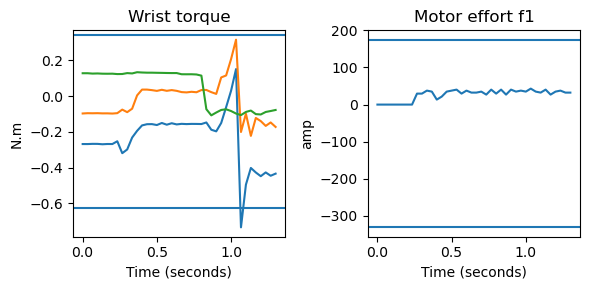

In [309]:
# Create two plots, one the wrist torque data, the other the motor effort f1
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6, 3))

time_step = 1.0 / 30   # Seconds
ts = np.arange(start=0, stop=pick_data_dict["n timesteps"] * time_step, step=time_step)

# To get the min and the max - you already built the reverse dictionary and did the stats.
which_channel_index = pick_data_dict["reverse dict"]["Wrist torque"]
ch_info =  pick_data_description["Data channels"][which_channel_index]
colors = ['r','g','b']
# The stats you already calculated and stored in the channel
stats_info = ch_info["stats"]
print(wrist_torque_data[0, :].shape)
# Use the z maximum and minimum
min_max_stats = (stats_info[2]["Min"], stats_info[2]["Max"])
plot_channel_row(axs[0], ts, wrist_torque_data[0], ch_info["dimensions"], ch_info["units"], ch_info["name"], min_max_stats)

# TODO Now do the Motor effort f1 plot in the second plot window
#  Don't forget that this only has 1 dimension of data
#  Get the units from the channel info

which_channel_index2 = pick_data_dict["reverse dict"]["Motor effort f1"]
ch_info2 =  pick_data_description["Data channels"][which_channel_index2]
stats_info2 = ch_info2["stats"]
min_max_stats2 = (stats_info2[0]["Min"], stats_info2[0]["Max"])
plot_channel_row(axs[1], ts, motor_effort_f1_data[0,], ch_info2["dimensions"], ch_info2["units"], ch_info2["name"], min_max_stats2)



plt.tight_layout()

In [310]:
grader.check("plot_function")

plot_function results:
    plot_function - 1 result:
        ❌ Test case failed
        Trying:
            print("This problem is manually graded, look at the slides for the expected plot")
        Expecting nothing
        **********************************************************************
        Line 1, in plot_function 0
        Failed example:
            print("This problem is manually graded, look at the slides for the expected plot")
        Expected nothing
        Got:
            This problem is manually graded, look at the slides for the expected plot

<!-- BEGIN QUESTION -->

## Week 3: Problem 3: Plot several channels for two rows

Plot the given channels for the first and second row. 
 - You should get the units, dimensions, and min/max values from **pick_data_description["Data channels"]**, not hard-wire the answers (If the list of channel names to print changed, your code should still work)
 - Title should have the row number in it, as well as the channel name, and if the pick was successful y/n
 
 - Top row: first successful pick
 - Bottom row: first unsuccessful pick
 
 - See https://docs.google.com/presentation/d/1ef0msC9XIT37_Yg94Cf4TL9VBgbIIfkKik8jgshskjE/edit?usp=sharing for what this should look like

You should be able to do this with calls to the plotting function above; you should not have to write any additional plotting code

In [311]:
# SCRATCH CELL
# In the previous problem I gave example code for how to use the reverse dictionary to get all of the info you need
#  for calling the plot function; copy it here and try changing the name from, eg, Wrist torque to Wrist force, and see if it still 
#  works. Then put it in a for loop for the actual channel name
# To get the data you'll have to go back and see how get_channel_data was called - again, using ch_info to get the parameters
#
# See the next cell for creating a for loop to loop over the two rows



In [312]:
# EXAMPLE CODE
# Here's an easy way to turn something into a for loop from some values
# Use this to loop over the rows

v1 = 1.0
v2 = 2.0
v3 = 3.0

# You'll need i to get out which axs[i, j] plot to use
for i, v in enumerate((v1, v2, v3)):
    print(f"Value {v}, at index {i}")

Value 1.0, at index 0
Value 2.0, at index 1
Value 3.0, at index 2


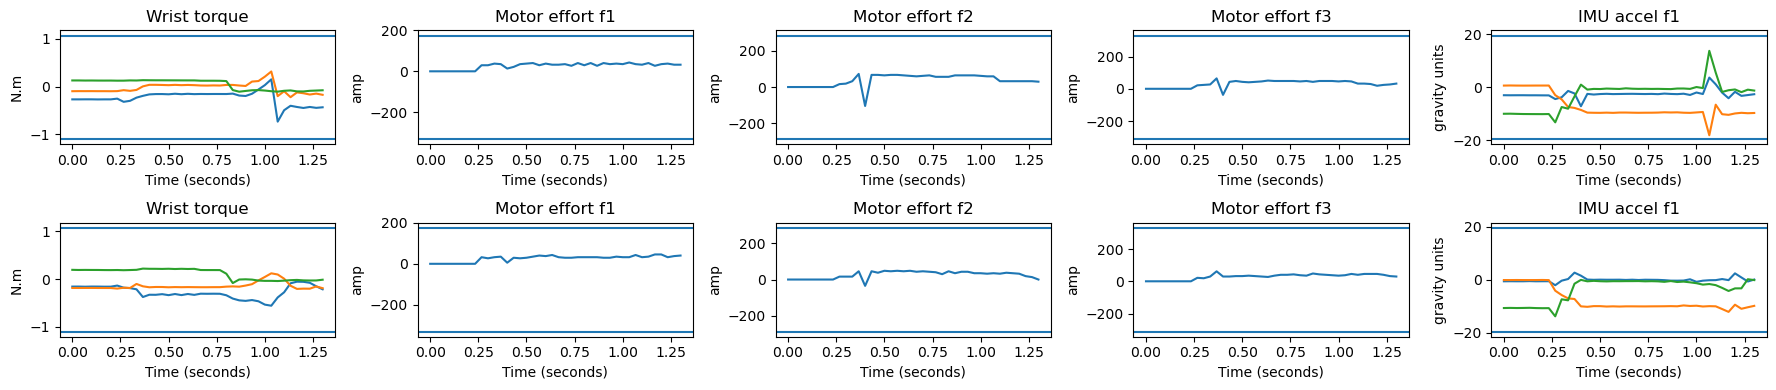

In [313]:
# Channel names - these are the channels that turned out to be the most important in determining if a pick failed
#   or not. Plot them for the two rows given (I did the np.where for you)

channel_names_to_plot = ["Wrist torque", "Motor effort f1", "Motor effort f2", "Motor effort f3", "IMU accel f1"]

# Getting the two rows to plot
first_successful_row = np.where(pick_data_dict["b_successful"] == True)[0][0]
first_unsuccessful_row = np.where(pick_data_dict["b_unsuccessful"] == True)[0][0]

n_rows = 2
n_cols = len(channel_names_to_plot)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4))

time_step = 1.0 / 30
ts = np.arange(start=0, stop=pick_data_dict["n timesteps"] * time_step, step=time_step)

# Pseudo code
# for each row
#    for each channel name in channel_names_to_plot
#        Use reverse dicitonary to get out the channel index (to get the ch_info)
#        Use the ch_info to get out both the stats AND the data slice
#        Remember to plot data[row, :], not all of data
#        You'll want to use enumerate to the the indices (ir and ic) to use for axs
#          plot_channel_row(axs[ir, ic], ts, ...)
#        Don't forget to change the title to include the row number and successful y/n
for ir, row in enumerate((first_successful_row, first_unsuccessful_row)):
    for ic, channel_name in enumerate(channel_names_to_plot):
        index  = pick_data_dict["reverse dict"][channel_name]   
        channel_info = pick_data_description["Data channels"][index]   
        data = get_channel_data(pick_data_dict, channel_info["index_offset"], channel_info["dimensions"])
        data_row = data[row, :]
        stats_info = channel_info["stats"]
        min_max_stats = (stats_info[0]["Min"], stats_info[0]["Max"])
        
        plot_channel_row(axs[ir,ic], ts, data_row, channel_info["dimensions"], channel_info["units"], channel_info["name"], min_max_stats)
        

plt.tight_layout()


In [314]:
grader.check("plot_specific_channels")

plot_specific_channels results:
    plot_specific_channels - 1 result:
        ❌ Test case failed
        Trying:
            print("This question is manually graded, look at the slides for the expected plot")
        Expecting nothing
        **********************************************************************
        Line 1, in plot_specific_channels 0
        Failed example:
            print("This question is manually graded, look at the slides for the expected plot")
        Expected nothing
        Got:
            This question is manually graded, look at the slides for the expected plot

<!-- END QUESTION -->

## Week 3: Optional: Plot Wrist force/torque for min/max wrist torque z

Find the row that has the maximum (minimum) wrist torque z value for the successful and unsuccessful picks. Plot the minimum one on the left, the maximum one on the right, and do successful on the top and unsuccessful on the bottom.

Full credit for doing this with two for loops; partial credit for doing four plot calls.

Note: you have already done a version of this in the first problem this week.

You do NOT need to do the optional/extra credit problems to get an A in this class. These optional problems are for the handful of students who "breezed" through the first set of problems and are looking for a bit more of a challenge. 

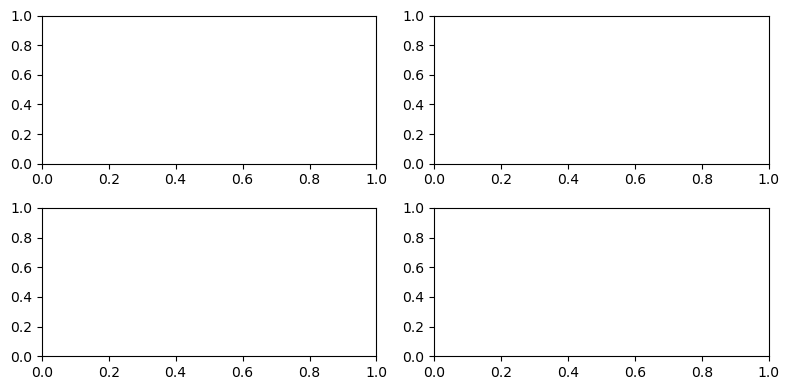

In [315]:
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 4))

...
fig.set_tight_layout(tight=True)


## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [316]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"the only thing i looke up that was significant and helpful was documentation on axs and axh line. my lab ran fine but would not call axs properly in the last part of the homework."}
# Approximate number of hours, including lab/in-class time
hours = 12

In [317]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit just the .ipynb file to Gradescope, HWK1 numpy and Plotting. You do not need to put in the data files. Don't change the provided variable names or autograding will fail.

In [318]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



RuntimeError: c:\Users\yeasshhhh\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
